# Global CO2 Emission Dataset
All the estimations in the dataset is expresssed in  million metric tons of carbon. To
convert these estimates to units of carbon dioxide (CO2), simply multiply, these estimates by 3.667.
There will be 5 stages involved in this project:
    1. Preprocessing
    2. Data Visulizationn
    3. Prediction
    4. Calculation
    5. Discussion and Conclusion

In [1]:

#Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import itertools
import statsmodels.tsa.api as smt
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from tqdm import tqdm_notebook
from itertools import product
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import HoltWintersResults
from datetime import datetime
import seaborn as sns
%matplotlib inline

#Set style
sns.set()
from pylab import rcParams
rcParams['figure.figsize'] = 12, 7
#To ignore some unimportant arnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing Dataset
data = pd.read_csv(r"C:\Users\tahmi\Documents\GitHub\ProgrammingForDataScienceProject\Data\global.1751_2014.csv")
print(data)

     Year  \
0    1751   
1    1752   
2    1753   
3    1754   
4    1755   
..    ...   
259  2010   
260  2011   
261  2012   
262  2013   
263  2014   

     Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)  \
0                                                    3                                                      
1                                                    3                                                      
2                                                    3                                                      
3                                                    3                                                      
4                                                    3                                                      
..                                                 ...                                                      
259                                               9128                          

In [3]:
data.head(10)

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
5,1756,3,0,0,3,0,0,NaN
6,1757,3,0,0,3,0,0,NaN
7,1758,3,0,0,3,0,0,NaN
8,1759,3,0,0,3,0,0,NaN
9,1760,3,0,0,3,0,0,NaN


# Stage1:Data Preprocessing

The steps involved in this stage are:
    
    1. Check data and fill missing values
    2. Check data types and proceed it accordingly
    3. Check and fill missing values
    4. Looing for outliers
    5. Removed unwanted columns

Loading dataset setting Year as index

In [4]:
data.head(10)

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
5,1756,3,0,0,3,0,0,NaN
6,1757,3,0,0,3,0,0,NaN
7,1758,3,0,0,3,0,0,NaN
8,1759,3,0,0,3,0,0,NaN
9,1760,3,0,0,3,0,0,NaN


We impoted global co2 emissions dataset and set \"Year\" as an index of our dataset to use time series analysis on it.

Data Exploration

We would like to keep the columns names in our dataset to remember easily, so we need to set our column names as shortened names

In [5]:
#Code execution
data.rename(columns={'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)': 'Total','Carbon emissions from gas fuel consumption':'Gas','Carbon emissions from liquid fuel consumption':'Liquids', 'Carbon emissions from solid fuel consumption':'Solids','Carbon emissions from cement production':'Cements', 'Carbon emissions from gas flaring':'Gas Flaring','Per capita carbon emissions (metric tons of carbon; after 1949 only)':'Per Capita'}, index={'ONE': 'one'}, inplace=True)

In [6]:
#Check the result
data.head()

,Year,Total,Gas,Liquids,Solids,Cements,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


Checking the information about our dataset.

In [7]:
#Code Execution
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         264 non-null    int64  
 1   Total        264 non-null    int64  
 2   Gas          264 non-null    int64  
 3   Liquids      264 non-null    int64  
 4   Solids       264 non-null    int64  
 5   Cements      264 non-null    int64  
 6   Gas Flaring  264 non-null    int64  
 7   Per Capita   65 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 18.6 KB


Looking at the above data informaion, we only have numeric values so we do not need to do any data formatting.Moreover, this shows that there are 264 rows with 7 columns.Also, you can see that there are some missing values in Per Capita columns and the data types of each columns are int64 except Per Capita which represents float64

In [8]:
#data is numeric, fill missing values with mean
data['Per Capita'].fillna(data['Per Capita'].mean(),inplace=True)

Looking for outliers

Text(0.5, 0, 'Gas Flaring')

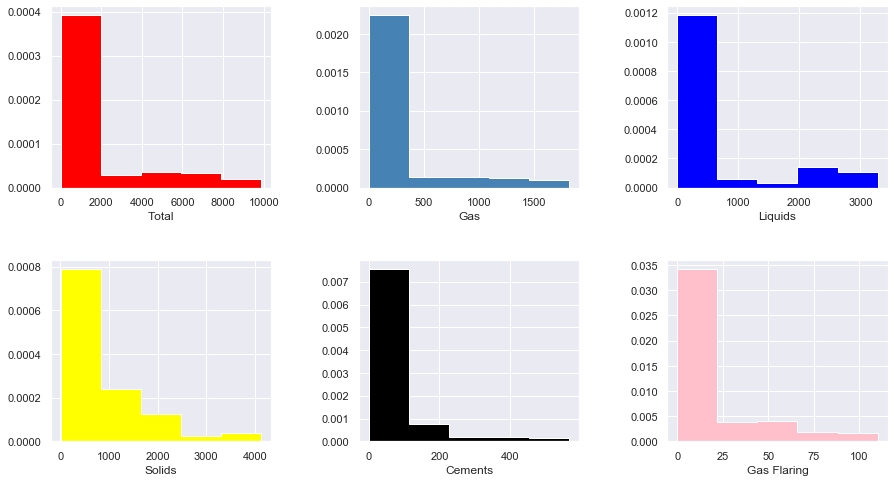

In [9]:
#Code execution\n",
plt.figure(figsize=(15, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(231)
plt.hist( data['Total'],bins=5, density=True,histtype='stepfilled',color='red')
plt.xlabel("Total")
    
    
plt.subplot(232)
plt.hist( data['Gas'],bins=5, density=True,histtype='stepfilled',color='steelblue')
plt.xlabel("Gas")

plt.subplot(233)
plt.hist( data['Liquids'],bins=5, density=True,histtype='stepfilled',color='blue')
plt.xlabel("Liquids")
    
plt.subplot(234)
plt.hist( data['Solids'],bins=5, density=True,histtype='stepfilled',color='yellow')
plt.xlabel("Solids")
    
plt.subplot(235)
plt.hist(data['Cements'],bins=5, density=True,histtype='stepfilled',color='black')
plt.xlabel("Cements")
    
plt.subplot(236)
plt.hist( data['Gas Flaring'],bins=5, density=True,histtype='stepfilled',color='pink')
plt.xlabel("Gas Flaring")

Above histograms show that our data are on a finer scale. Additionally, there are no outliers included in this observation

In [10]:
data.dtypes

Year             int64
Total            int64
Gas              int64
Liquids          int64
Solids           int64
Cements          int64
Gas Flaring      int64
Per Capita     float64
dtype: object

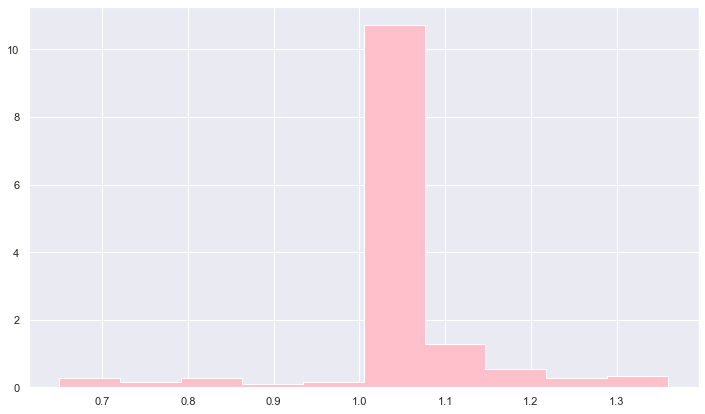

In [11]:
data['Per Capita'].hist(bins=10,density=True,histtype='stepfilled',color='pink')

As can be seen in the histogram plot above,no outliers are displyed on the plot but there is something wrong with the Y-axis.So we went through our source file and found out that data for global per capita are not available before 1950 and emission estimates are expressed in metric tons of carbon.And also,it was not added to on top of Total carbon emissions.Therefore,'Per Capita' will not be used to predict our model. Then, we decided to safely remove it. 

Removing Unused Columns

In [12]:
#Code execution\n",
#Dropping the unused columns
data.drop(columns='Per Capita', inplace=True)

In [13]:
#There is no missing values
data.isna().sum()

Year           0
Total          0
Gas            0
Liquids        0
Solids         0
Cements        0
Gas Flaring    0
dtype: int64

In [14]:
#return size of rows and cols
data.shape

(264, 7)

In [15]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            254, 255, 256, 257, 258, 259, 260, 261, 262, 263],
           dtype='int64', length=264)

In [16]:
data.columns

Index(['Year', 'Total', 'Gas', 'Liquids', 'Solids', 'Cements', 'Gas Flaring'], dtype='object')

In [17]:
data.loc[0]

Year           1751
Total             3
Gas               0
Liquids           0
Solids            3
Cements           0
Gas Flaring       0
Name: 0, dtype: int64

In [18]:
data.dtypes

Year           int64
Total          int64
Gas            int64
Liquids        int64
Solids         int64
Cements        int64
Gas Flaring    int64
dtype: object

In [19]:
#find missing values
data.isna().sum()

Year           0
Total          0
Gas            0
Liquids        0
Solids         0
Cements        0
Gas Flaring    0
dtype: int64

There is no missing values in our global dataset

In [21]:
#There is no missing values
data.isna().sum()

Year           0
Total          0
Gas            0
Liquids        0
Solids         0
Cements        0
Gas Flaring    0
dtype: int64

In [22]:
data.notnull()

,Year,Total,Gas,Liquids,Solids,Cements,Gas Flaring
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
259,True,True,True,True,True,True,True
260,True,True,True,True,True,True,True
261,True,True,True,True,True,True,True
262,True,True,True,True,True,True,True


In [23]:
data.describe()

,Year,Total,Gas,Liquids,Solids,Cements,Gas Flaring
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,1882.500000,1522.984848,209.166667,536.609848,721.541667,41.723485,13.969697
std,76.354437,2444.152273,439.181345,984.092272,949.056349,99.373720,27.029892
min,1751.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,1816.750000,13.750000,0.000000,0.000000,13.750000,0.000000,0.000000
50%,1882.500000,264.000000,0.000000,4.000000,260.500000,0.000000,0.000000
75%,1948.250000,1431.500000,77.250000,362.500000,1064.750000,14.500000,0.000000
max,2014.000000,9855.000000,1823.000000,3280.000000,4126.000000,568.000000,110.000000


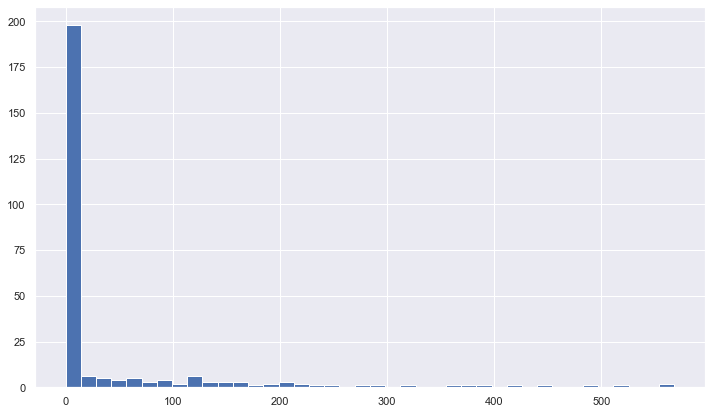

In [24]:
data['Cements'].hist(bins=40)

We can see that our data looks fine, all columns count is at 264. This means that there are no missing values.
We alreday have formatted dataset.Next we would like to set Year as our index to use time series analysis on it.

# Stage 2:Data Analysis

The steps involved in this stage are:
        1. Basic Data Analysis
        2. Visualization Analysis

Basic Data Analysis 

In [25]:
#Execution code
data.describe()

,Year,Total,Gas,Liquids,Solids,Cements,Gas Flaring
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,1882.500000,1522.984848,209.166667,536.609848,721.541667,41.723485,13.969697
std,76.354437,2444.152273,439.181345,984.092272,949.056349,99.373720,27.029892
min,1751.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,1816.750000,13.750000,0.000000,0.000000,13.750000,0.000000,0.000000
50%,1882.500000,264.000000,0.000000,4.000000,260.500000,0.000000,0.000000
75%,1948.250000,1431.500000,77.250000,362.500000,1064.750000,14.500000,0.000000
max,2014.000000,9855.000000,1823.000000,3280.000000,4126.000000,568.000000,110.000000


We can see that our data looks fine, all columns count is at 264. This means that there are no missing values.
We can also use the mean from each soucre to find the CO2 distributions, which will later on be used for computaions.

Visualization Analysis

To get a clear picture of what is going on with the data, it is best to use plots and do visualization analysis.

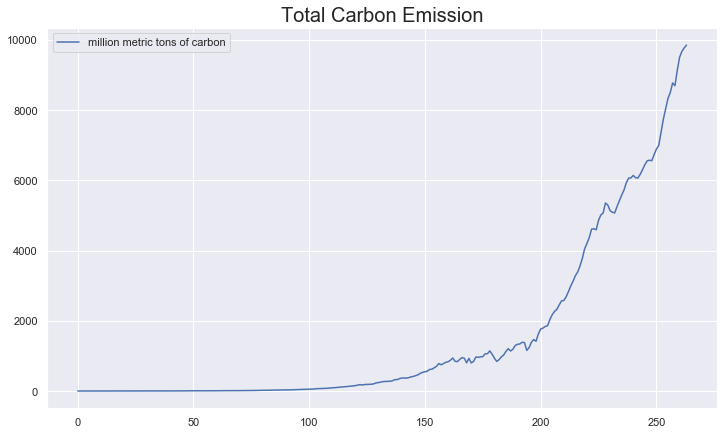

In [26]:
#Visualizing code
plt.figure()
ax = plt.axes()
ax.set_title('Total Carbon Emission', fontsize=20)
ax.plot(data['Total'], label= 'million metric tons of carbon')
ax.legend()

The carbon distribution seems to follow a pattern. It goes up at the beginning of the year unil the end of it.

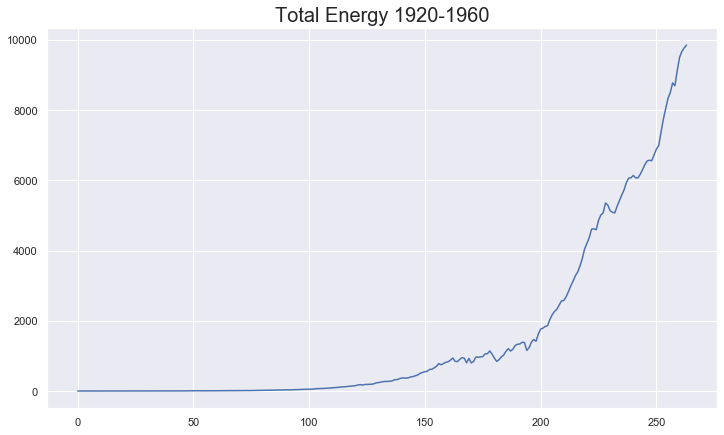

In [30]:
#Visualizing code
plt.figure()
ax = plt.axes()
ax.set_title('Total Energy 1920-1960', fontsize=20)
ax.plot(data.Total) #need to fix this

Above graph displys that the carbon consumption fluctuated between 1920 and 1950. Form 1950, the trend line dramatically increased at the end of the period.

# Time-series decomposition
This is a technique called 'Time Series Decomposition', it can be used to help analyze our the data's trend, seasonality and noise and  it helps to improve forecast accuracy

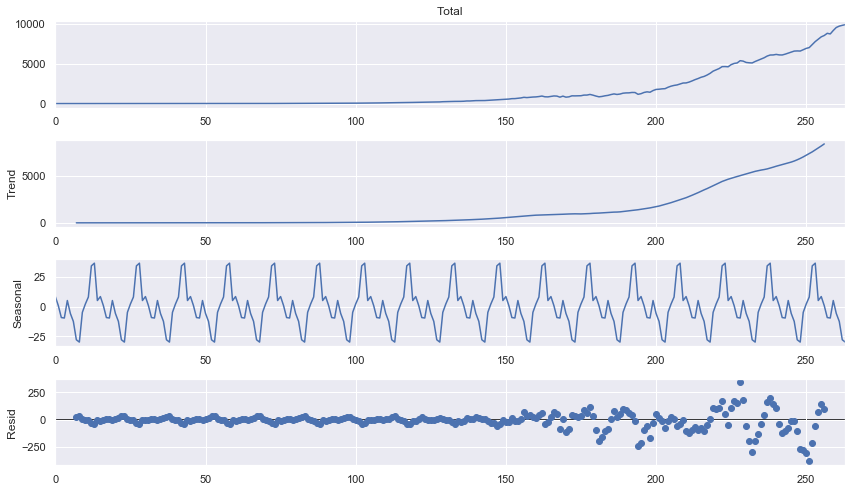

In [31]:
#Visualizing code
decomposition = smt.seasonal_decompose(data['Total'], model='additive', freq=15)
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the emissions of carbon is unstable, along with its obvious seasonality.The graph shows that seasonality has an effect on Carbon emissions. This proves that something is causing the carbon emissions to go up and down regularly.

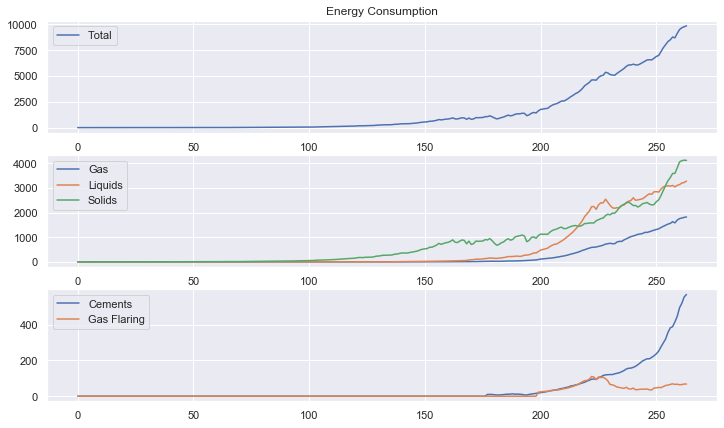

In [32]:
#Visualizing code\n",
    
fig,ax = plt.subplots(3)
ax[0].set_title('Energy Consumption')
ax[0].plot(data['Total'],label='Total')
ax[1].plot(data['Gas'],label='Gas')
ax[1].plot(data['Liquids'],label='Liquids')
ax[1].plot(data['Solids'],label='Solids')
ax[2].plot(data['Cements'],label='Cements')
ax[2].plot(data['Gas Flaring'],label='Gas Flaring')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

# Stage 3 : Forecasting
Models that will be used: Triple Exponential Smoothing Moving Average, Autoregressive Moving Average, and Seasonal Autoregressive Integrated Moving Average.

The steps involved in this stage are:
    1. Creating the models
    2. Comparing the models

### Creating the Models

Triple Exponential Smoothing Moving Average

Triple Exponential Smoothing Moving Average is a good model to set our baseline on, since this model is basically moving average model that takes into account the data's weight, trend, and seasonality. It also has another name, Holt Winter’s Exponential Smoothing or (HWES).

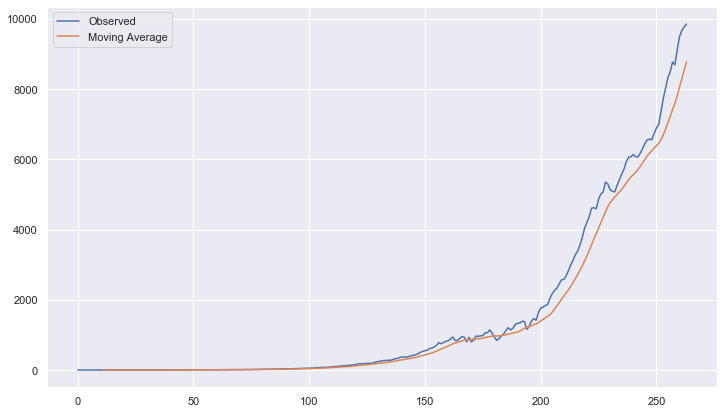

In [33]:
#Execution Code\n",
moving_avg = data.rolling(12).mean()
plt.figure()
plt.plot(data['Total'], label= 'Observed')
plt.plot(moving_avg['Total'], label= 'Moving Average')
plt.legend()

The graph illustrated above is the moving average of our data in the time frame of 12 months. This graph can help us understand the direction of where our data is heading. But it is very crude and can only predict simple directions. However, this graph shows the basis in which our Triple Exponential Smoothing Moving Average is built upon.

Now we can start building our Triple Exponential Smoothing Moving Average model. We will be using TESMA as it's abbreviation.

In [34]:
#Surpress Warnings
warnings.filterwarnings('ignore')
    
#Execution Code
model = ExponentialSmoothing(data['Total'],trend='additive')
model_TESMA = model.fit()
pred = HoltWintersResults.predict(model_TESMA,start='1751', end='2014') #need to fix here
temp = data.copy()
temp['pred'] = pred

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

NameError: name 'temp' is not defined

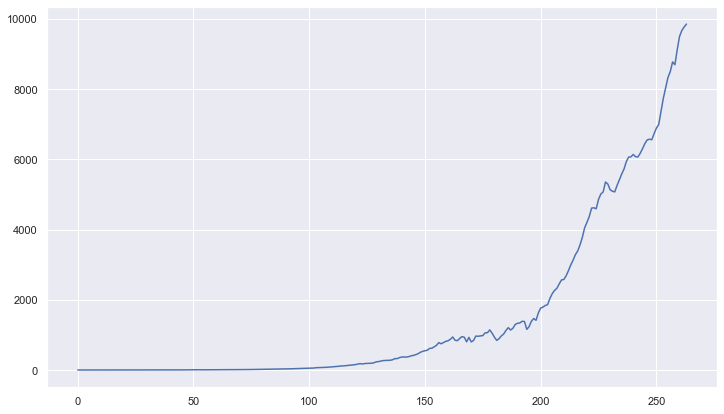

In [35]:
#Visualizing code
plt.figure()
plt.plot(data['Total'], label='Observed')
plt.plot(temp['pred'], label='Predicted')
plt.legend()

In [36]:
#Surpress Warnings\n",
warnings.filterwarnings('ignore')
    
#Execution Code
def optimize_SARIMA(parameters_list, d, D, s):
    
results = [pd.np.empty((2))]
    
best_aic = float('inf')
    
for param in tqdm_notebook(parameters_list):
try: model = SARIMAX(data['Total'], order=(param[0], d, param[1]),
seasonal_order=(param[2], D, param[3], s)).fit(disp=False)
except:
continue
aic = model.aic

#Save best model, AIC and parameters
if aic < best_aic:
model_SARIMA = model
best_aic = aic
best_param = param
results.append([param, model.aic])
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']

#Sort in ascending order, lower AIC is better
result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
return result_table
result_table = optimize_SARIMA(parameters_list, d, D, s)

IndentationError: expected an indented block (<ipython-input-36-632c782875da>, line 7)

In [37]:
#Exectution Code
    
#Set parameters that give the lowest AIC (Akaike Information Criteria)
    
p, q, P, Q = result_table.parameters[1]
    
model_SARIMA = SARIMAX(data['Total'], order=(p, d, q),
seasonal_order=(P, D, Q, s)).fit(disp=False)

NameError: name 'result_table' is not defined

In [38]:
#Visualizing code\n",
model_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

NameError: name 'model_SARIMA' is not defined